In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import gmaps
import os
from census import Census
import subprocess
import sys
import seaborn as sn
import statsmodels.api as sm
from scipy.stats import linregress

from api_keys import g_key

censusKey = "e6bebf06ffb8c7c20004cacb7b0567f80d0db89d"

c = Census(censusKey, year=2010)

In [2]:
gmaps.configure(api_key=g_key)

In [3]:
df = pd.read_csv (r'COVID-19 Cases.csv')
df.tail(3)

C:\Users\kylec\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
689721,Confirmed,NaN,0,0,1/22/2020,"Kodiak Island, Alaska, US",US,Alaska,Kodiak Island,US,USA,2150.0,57.655294,-153.749358,12998.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
689722,Confirmed,NaN,0,0,1/22/2020,"Rains, Texas, US",US,Texas,Rains,US,USA,48379.0,32.871094,-95.792327,12514.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
689723,Confirmed,NaN,0,0,1/22/2020,"Hampton, South Carolina, US",US,South Carolina,Hampton,US,USA,45049.0,32.774196,-81.138456,19222.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20


In [4]:
#"Federal Correctional Institution (FCI)" & "Michigan Department of Corrections (MDOC)"

mask1 = df["Case_Type"] == "Confirmed"
mask2 = df["Country_Region"] == "US"
mask3 = mask1 & mask2

cleanUS = df.loc[mask3][["Cases", "Date", "Combined_Key", "Admin2", "Province_State", "Lat", "Long", "Population_Count"]].sort_values(["Date"]).dropna(how='any').rename(columns={"Admin2": "City", "Combined_Key": "City, State, Country", "Population_Count": "Population"})
cleanUS

,Cases,Date,"City, State, Country",City,Province_State,Lat,Long,Population
689723,0,1/22/2020,"Hampton, South Carolina, US",Hampton,South Carolina,32.774196,-81.138456,19222.0
659468,0,1/22/2020,"Venango, Pennsylvania, US",Venango,Pennsylvania,41.403234,-79.758454,50668.0
659469,0,1/22/2020,"Kent, Delaware, US",Kent,Delaware,39.086466,-75.568849,180786.0
659470,0,1/22/2020,"Saline, Missouri, US",Saline,Missouri,39.137343,-93.202600,22761.0
659471,0,1/22/2020,"Daviess, Indiana, US",Daviess,Indiana,38.701860,-87.071854,33351.0
...,...,...,...,...,...,...,...,...
487841,2,4/9/2020,"Chickasaw, Iowa, US",Chickasaw,Iowa,43.060013,-92.317733,11933.0
165297,1,4/9/2020,"Woodruff, Arkansas, US",Woodruff,Arkansas,35.189025,-91.243949,6320.0
522439,179,4/9/2020,"Volusia, Florida, US",Volusia,Florida,29.058589,-81.182633,553284.0
499531,14,4/9/2020,"Rockwall, Texas, US",Rockwall,Texas,32.897795,-96.407716,104915.0


In [5]:
cleanUS.rename(columns={"Admin2": "City", "Combined_Key": "City, State, Country", "Population_Count": "Population"})

,Cases,Date,"City, State, Country",City,Province_State,Lat,Long,Population
689723,0,1/22/2020,"Hampton, South Carolina, US",Hampton,South Carolina,32.774196,-81.138456,19222.0
659468,0,1/22/2020,"Venango, Pennsylvania, US",Venango,Pennsylvania,41.403234,-79.758454,50668.0
659469,0,1/22/2020,"Kent, Delaware, US",Kent,Delaware,39.086466,-75.568849,180786.0
659470,0,1/22/2020,"Saline, Missouri, US",Saline,Missouri,39.137343,-93.202600,22761.0
659471,0,1/22/2020,"Daviess, Indiana, US",Daviess,Indiana,38.701860,-87.071854,33351.0
...,...,...,...,...,...,...,...,...
487841,2,4/9/2020,"Chickasaw, Iowa, US",Chickasaw,Iowa,43.060013,-92.317733,11933.0
165297,1,4/9/2020,"Woodruff, Arkansas, US",Woodruff,Arkansas,35.189025,-91.243949,6320.0
522439,179,4/9/2020,"Volusia, Florida, US",Volusia,Florida,29.058589,-81.182633,553284.0
499531,14,4/9/2020,"Rockwall, Texas, US",Rockwall,Texas,32.897795,-96.407716,104915.0


In [33]:
mask = cleanUS["Date"] == "4/28/2020"
apr28 = cleanUS.loc[mask]
apr28.head()

,Cases,Date,"City, State, Country",City,Province_State,Lat,Long,Population,Zipcode
642429,7,4/28/2020,"Park, Montana, US",Park,Montana,45.489651,-110.526439,16606.0,59047
676479,376,4/28/2020,"Cameron, Texas, US",Cameron,Texas,26.145242,-97.481404,423163.0,78586
677222,39,4/28/2020,"Johnson, Georgia, US",Johnson,Georgia,32.702111,-82.661668,9643.0,31096
111949,695,4/28/2020,"Woodbury, Iowa, US",Woodbury,Iowa,42.389794,-96.045944,103107.0,51039
472647,24,4/28/2020,"Morton, North Dakota, US",Morton,North Dakota,46.716818,-101.282238,31364.0,58563


In [34]:
locations3 = apr28[["Lat", "Long"]].astype(float)
cases3 = apr28["Cases"]

In [35]:
fig = gmaps.figure()

heatLayer = gmaps.heatmap_layer(locations3, weights=cases3, dissipating=False, max_intensity=2000, point_radius = 1)

fig.add_layer(heatLayer)

fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
mask = cleanUS["Date"] == "3/31/2020"
mar31 = cleanUS.loc[mask]
mar31.head()

,Cases,Date,"City, State, Country",City,Province_State,Lat,Long,Population,Zipcode
89635,10,3/31/2020,"Saline, Arkansas, US",Saline,Arkansas,34.649161,-92.675832,122437.0,72019
673649,0,3/31/2020,"Greeley, Nebraska, US",Greeley,Nebraska,41.567427,-98.521503,2356.0,68842
642386,3,3/31/2020,"Walker, Texas, US",Walker,Texas,30.738730,-95.574410,72971.0,77320
203694,0,3/31/2020,"Johnston, Oklahoma, US",Johnston,Oklahoma,34.314405,-96.660115,11085.0,73460
107111,29,3/31/2020,"Montgomery, Alabama, US",Montgomery,Alabama,32.220683,-86.209693,226486.0,36116


In [37]:
locations2 = mar31[["Lat", "Long"]].astype(float)
cases2 = mar31["Cases"]

In [38]:
fig = gmaps.figure()

heatLayer = gmaps.heatmap_layer(locations2, weights=cases2, dissipating=False, max_intensity=2000, point_radius = 1)

fig.add_layer(heatLayer)

fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
mask = cleanUS["Date"] == "2/28/2020"
feb28 = cleanUS.loc[mask]
feb28.head()

,Cases,Date,"City, State, Country",City,Province_State,Lat,Long,Population
506286,0,2/28/2020,"Lee, Georgia, US",Lee,Georgia,31.779331,-84.143243,29992.0
641184,0,2/28/2020,"Union, Indiana, US",Union,Indiana,39.625508,-84.924971,7054.0
487254,0,2/28/2020,"Adams, Mississippi, US",Adams,Mississippi,31.476698,-91.353260,30693.0
208307,0,2/28/2020,"Washington, Rhode Island, US",Washington,Rhode Island,41.459616,-71.614353,125577.0
344459,0,2/28/2020,"Surry, North Carolina, US",Surry,North Carolina,36.416895,-80.691023,71783.0


In [10]:
locations1 = feb28[["Lat", "Long"]].astype(float)
cases1 = feb28["Cases"]

In [11]:
fig = gmaps.figure()

heatLayer = gmaps.heatmap_layer(locations1, weights=cases1, dissipating=False, max_intensity=100, point_radius = 1)

fig.add_layer(heatLayer)

fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
cleanUS["City, State, Country"].nunique()

3150

In [13]:
citiesDf = cleanUS.groupby(["City, State, Country", "Lat", "Long"]).count().reset_index()[["City, State, Country", "Lat", "Long"]]
citiesDf.head()

,"City, State, Country",Lat,Long
0,"Abbeville, South Carolina, US",34.223334,-82.461707
1,"Acadia, Louisiana, US",30.295065,-92.414197
2,"Accomack, Virginia, US",37.767072,-75.632346
3,"Ada, Idaho, US",43.452658,-116.241552
4,"Adair, Iowa, US",41.330756,-94.471059


In [14]:
params = {"key": g_key}
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

zipcode = []

for index, rows in citiesDf.iterrows():
    lat = rows["Lat"]
    lng = rows["Long"]
    
    # update address key value
    params['latlng'] = f"{lat},{lng}"
    # make request
    thing = requests.get(base_url, params=params)
    thing = thing.json()
    thing["results"][0]["address_components"]
    
    zipcodefail = False
    
    for addressComp in thing["results"][0]["address_components"]:
        if addressComp["types"][0] == "postal_code":
            zipcode.append(addressComp["long_name"])
            zipcodefail = True
            break
    if not zipcodefail:
        zipcode.append(-1)
    
    if index % 500 == 0:
        print(index)

0
500
1000
1500
2000
2500
3000


In [15]:
len(zipcode)

3150

In [16]:
citiesDf["Zipcode"] = zipcode
citiesDf.head()

,"City, State, Country",Lat,Long,Zipcode
0,"Abbeville, South Carolina, US",34.223334,-82.461707,29620
1,"Acadia, Louisiana, US",30.295065,-92.414197,70526
2,"Accomack, Virginia, US",37.767072,-75.632346,23421
3,"Ada, Idaho, US",43.452658,-116.241552,83634
4,"Adair, Iowa, US",41.330756,-94.471059,50849


In [17]:
citiesDf.to_csv("cities.csv", index=False)

In [18]:
cityzip = dict(zip(citiesDf["City, State, Country"], citiesDf["Zipcode"]))
cleanUS["Zipcode"] = cleanUS["City, State, Country"].map(cityzip)

In [19]:
cleanUS.to_csv("ZipCodes.csv", index=False)

In [20]:
from census import Census
censusKey = "e6bebf06ffb8c7c20004cacb7b0567f80d0db89d"

c = Census(censusKey)

In [21]:
#median household income: B19013_001E
#total population: B01003_001E
#median age: B01002_001E
#people over 25 with no schooling at all: B15003_002E
#people with a high school diploma: B15003_017E
#people with an Associate's degree: B15003_021E
#people with a Bachelor's degree: B15003_022E
#people with a Master's degree: B15003_023E
#people with a Professional degree: B15003_024E
#people with a Ph.D.: B15003_025E

census_data = c.acs5.get(("NAME", "B19013_001E", "B19301_001E", "B01003_001E", "B01002_001E", "B17001_002E",
                          "B15003_002E", "B15003_017E", "B15003_021E", "B15003_022E", "B15003_023E", "B15003_023E", "B15003_024E", "B15003_025E"),
                         {'for':'zip code tabulation area:*'})

In [22]:
censusPd = pd.DataFrame(census_data)

censusPd = censusPd.rename(columns={"zip code tabulation area": "Zipcode",
                                    "B01003_001E": "Population",
                                    "B01002_001E": "Med Age",
                                    "B19013_001E": "Med Household Income",
                                    "B19301_001E": "Per Capita Income",
                                    "B17001_002E": "Population in Poverty",
                                    "B15003_002E": "Over 25 No Schooling",
                                    "B15003_017E": "High School Diploma",
                                    "B15003_024E": "Prof Deg",
                                    "B15003_021E": "Assoc Deg",
                                    "B15003_022E": "Bach Deg",
                                    "B15003_023E": "Mast Deg",
                                    "B15003_025E": "PhD"})
cleanCensus = censusPd[["Zipcode", "Population", "Med Age", "Med Household Income", "Per Capita Income",
                            "Population in Poverty", "Over 25 No Schooling", "High School Diploma", "Prof Deg",
                            "Assoc Deg", "Bach Deg", "Mast Deg", "PhD"]]
cleanCensus.head()

,Zipcode,Population,Med Age,Med Household Income,Per Capita Income,Population in Poverty,Over 25 No Schooling,High School Diploma,Prof Deg,Assoc Deg,Bach Deg,Mast Deg,PhD
0,00601,17242.0,40.5,13092.0,6999.0,10772.0,492.0,2868.0,15.0,888.0,1781.0,216.0,79.0
1,00602,38442.0,42.3,16358.0,9277.0,19611.0,901.0,5751.0,201.0,3387.0,3692.0,1119.0,312.0
2,00603,48814.0,41.1,16603.0,11307.0,24337.0,924.0,8745.0,297.0,2370.0,5888.0,1437.0,280.0
3,00606,6437.0,43.3,12832.0,5943.0,4163.0,185.0,1284.0,0.0,241.0,311.0,120.0,0.0
4,00610,27073.0,42.1,19309.0,10220.0,11724.0,643.0,4945.0,54.0,2241.0,2498.0,749.0,66.0


In [23]:
mask = citiesDf["Zipcode"] != "-1"
cleanCities =citiesDf.loc[mask]

mergeDf = pd.merge(cleanCities, cleanCensus, on="Zipcode")
mergeDf.head()

,"City, State, Country",Lat,Long,Zipcode,Population,Med Age,Med Household Income,Per Capita Income,Population in Poverty,Over 25 No Schooling,High School Diploma,Prof Deg,Assoc Deg,Bach Deg,Mast Deg,PhD
0,"Abbeville, South Carolina, US",34.223334,-82.461707,29620,13006.0,44.0,36963.0,21719.0,3048.0,133.0,2572.0,52.0,996.0,1123.0,246.0,35.0
1,"Acadia, Louisiana, US",30.295065,-92.414197,70526,17989.0,37.0,31459.0,20402.0,5957.0,76.0,3323.0,27.0,730.0,1247.0,517.0,74.0
2,"Accomack, Virginia, US",37.767072,-75.632346,23421,3884.0,38.4,36490.0,21374.0,1365.0,7.0,777.0,0.0,168.0,202.0,67.0,7.0
3,"Ada, Idaho, US",43.452658,-116.241552,83634,27380.0,32.6,66935.0,21319.0,1905.0,60.0,4360.0,55.0,1605.0,2345.0,737.0,72.0
4,"Adair, Iowa, US",41.330756,-94.471059,50849,2423.0,46.5,50917.0,31015.0,196.0,0.0,728.0,20.0,278.0,182.0,48.0,5.0


In [24]:
clean1Df = pd.merge(mergeDf, apr28, on=["City, State, Country", "Lat", "Long"])
clean1Df.head()

clean1Df["Calc"] = clean1Df["Population_x"] / clean1Df["Population_y"]

In [25]:
columns=  ["Population in Poverty", "Over 25 No Schooling", "High School Diploma","Prof Deg","Assoc Deg",
           "Bach Deg", "Mast Deg", "PhD"]
for col in columns:
    clean1Df[col+"Update"] = clean1Df[col] * (clean1Df["Calc"] + 1)
clean1Df.head()

,"City, State, Country",Lat,Long,Zipcode,Population_x,Med Age,Med Household Income,Per Capita Income,Population in Poverty,Over 25 No Schooling,...,Population_y,Calc,Population in PovertyUpdate,Over 25 No SchoolingUpdate,High School DiplomaUpdate,Prof DegUpdate,Assoc DegUpdate,Bach DegUpdate,Mast DegUpdate,PhDUpdate
0,"Abbeville, South Carolina, US",34.223334,-82.461707,29620,13006.0,44.0,36963.0,21719.0,3048.0,133.0,...,24527.0,0.530273,4664.271374,203.526277,3935.861540,79.574184,1524.151670,1718.496310,376.447099,53.559547
1,"Acadia, Louisiana, US",30.295065,-92.414197,70526,17989.0,37.0,31459.0,20402.0,5957.0,76.0,...,62045.0,0.289935,7684.141156,98.035039,4286.453090,34.828238,941.652349,1608.548602,666.896253,95.455170
2,"Accomack, Virginia, US",37.767072,-75.632346,23421,3884.0,38.4,36490.0,21374.0,1365.0,7.0,...,32316.0,0.120188,1529.056814,7.841317,870.386186,0.000000,188.191608,226.278005,75.052606,7.841317
3,"Ada, Idaho, US",43.452658,-116.241552,83634,27380.0,32.6,66935.0,21319.0,1905.0,60.0,...,481587.0,0.056854,2013.306287,63.411222,4607.882106,58.126953,1696.250179,2478.321913,778.901173,76.093466
4,"Adair, Iowa, US",41.330756,-94.471059,50849,2423.0,46.5,50917.0,31015.0,196.0,0.0,...,7152.0,0.338786,262.402125,0.000000,974.636465,26.775727,372.182606,243.659116,64.261745,6.693932


In [26]:
clean1Df.columns

Index(['City, State, Country', 'Lat', 'Long', 'Zipcode', 'Population_x',
       'Med Age', 'Med Household Income', 'Per Capita Income',
       'Population in Poverty', 'Over 25 No Schooling', 'High School Diploma',
       'Prof Deg', 'Assoc Deg', 'Bach Deg', 'Mast Deg', 'PhD', 'Cases', 'Date',
       'City', 'Province_State', 'Population_y', 'Calc',
       'Population in PovertyUpdate', 'Over 25 No SchoolingUpdate',
       'High School DiplomaUpdate', 'Prof DegUpdate', 'Assoc DegUpdate',
       'Bach DegUpdate', 'Mast DegUpdate', 'PhDUpdate'],
      dtype='object')

In [27]:
clean2Df = clean1Df[['City, State, Country','Lat', 'Long', 'Cases', 'Med Age', 'Med Household Income', 'Per Capita Income',
       'City', 'Province_State', 'Population_y', 'Population in PovertyUpdate', 'Over 25 No SchoolingUpdate',
       'High School DiplomaUpdate', 'Prof DegUpdate', 'Assoc DegUpdate', 'Bach DegUpdate', 'Mast DegUpdate', 'PhDUpdate']]
clean2Df.rename(columns = {'Population_y': 'Population',
                           'Population in PovertyUpdate': 'Population in Poverty',
                           'Over 25 No SchoolingUpdate': 'Over 25 No Schooling',
                           'High School DiplomaUpdate': 'High School Diploma',
                           'Prof DegUpdate': "Prof Deg",
                           'Assoc DegUpdate': 'Assoc Deg',
                           'Bach DegUpdate': 'Bach Deg',
                           'Mast DegUpdate': 'Mast Deg',
                           'PhDUpdate': 'PhD'}, inplace = True)
clean2Df.head()

C:\Users\kylec\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,"City, State, Country",Lat,Long,Cases,Med Age,Med Household Income,Per Capita Income,City,Province_State,Population,Population in Poverty,Over 25 No Schooling,High School Diploma,Prof Deg,Assoc Deg,Bach Deg,Mast Deg,PhD
0,"Abbeville, South Carolina, US",34.223334,-82.461707,29,44.0,36963.0,21719.0,Abbeville,South Carolina,24527.0,4664.271374,203.526277,3935.861540,79.574184,1524.151670,1718.496310,376.447099,53.559547
1,"Acadia, Louisiana, US",30.295065,-92.414197,130,37.0,31459.0,20402.0,Acadia,Louisiana,62045.0,7684.141156,98.035039,4286.453090,34.828238,941.652349,1608.548602,666.896253,95.455170
2,"Accomack, Virginia, US",37.767072,-75.632346,223,38.4,36490.0,21374.0,Accomack,Virginia,32316.0,1529.056814,7.841317,870.386186,0.000000,188.191608,226.278005,75.052606,7.841317
3,"Ada, Idaho, US",43.452658,-116.241552,662,32.6,66935.0,21319.0,Ada,Idaho,481587.0,2013.306287,63.411222,4607.882106,58.126953,1696.250179,2478.321913,778.901173,76.093466
4,"Adair, Iowa, US",41.330756,-94.471059,1,46.5,50917.0,31015.0,Adair,Iowa,7152.0,262.402125,0.000000,974.636465,26.775727,372.182606,243.659116,64.261745,6.693932


In [28]:
corrs = clean2Df.corr()
corrs

,Lat,Long,Cases,Med Age,Med Household Income,Per Capita Income,Population,Population in Poverty,Over 25 No Schooling,High School Diploma,Prof Deg,Assoc Deg,Bach Deg,Mast Deg,PhD
Lat,1.000000,-0.228077,0.017615,-0.026096,-0.035703,-0.025994,-0.050971,-0.237625,-0.200237,-0.159954,-0.035006,-0.090354,-0.063298,-0.047474,-0.027092
Long,-0.228077,1.000000,0.077570,0.048893,0.083434,0.048882,0.004683,0.135983,0.060191,0.183811,0.130252,0.137177,0.117871,0.162490,0.103623
Cases,0.017615,0.077570,1.000000,-0.001577,0.005205,-0.001465,0.612479,0.009120,0.026712,0.006901,0.230102,0.010631,0.097349,0.121237,0.095402
Med Age,-0.026096,0.048893,-0.001577,1.000000,0.415735,1.000000,-0.046496,0.023804,0.016827,0.028188,0.017861,0.027364,0.023044,0.020784,0.013892
Med Household Income,-0.035703,0.083434,0.005205,0.415735,1.000000,0.415733,-0.008029,0.056468,0.039884,0.066836,0.042989,0.064780,0.054801,0.049326,0.032941
Per Capita Income,-0.025994,0.048882,-0.001465,1.000000,0.415733,1.000000,-0.046395,0.023742,0.016791,0.028168,0.018005,0.027384,0.023146,0.020904,0.013991
Population,-0.050971,0.004683,0.612479,-0.046496,-0.008029,-0.046395,1.000000,0.085212,0.132994,0.072874,0.245696,0.110648,0.204749,0.209046,0.140602
Population in Poverty,-0.237625,0.135983,0.009120,0.023804,0.056468,0.023742,0.085212,1.000000,0.835885,0.869504,0.485744,0.811154,0.646432,0.551321,0.401261
Over 25 No Schooling,-0.200237,0.060191,0.026712,0.016827,0.039884,0.016791,0.132994,0.835885,1.000000,0.804414,0.425860,0.740954,0.589624,0.471146,0.248905
High School Diploma,-0.159954,0.183811,0.006901,0.028188,0.066836,0.028168,0.072874,0.869504,0.804414,1.000000,0.516043,0.919622,0.730246,0.611039,0.330848


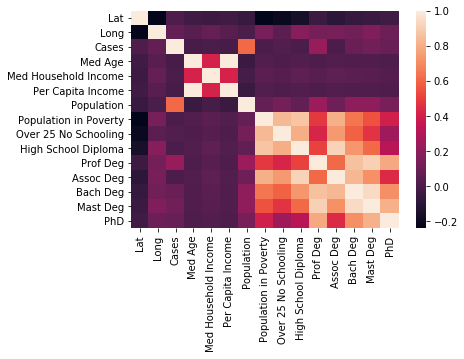

In [29]:
sn.heatmap(corrs)

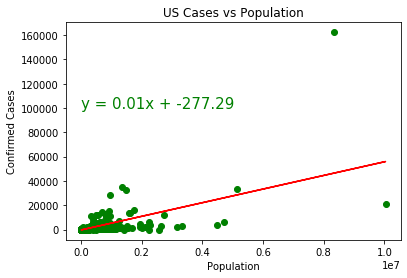

In [30]:
x_values = clean2Df['Population']
y_values = clean2Df['Cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100000),fontsize=15, color="green")
plt.xlabel('Population')
plt.ylabel('Confirmed Cases')
plt.title('US Cases vs Population')
plt.show()

In [31]:
x = clean2Df["Population"]
y = clean2Df["Cases"]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cases   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     1842.
Date:                Thu, 14 May 2020   Prob (F-statistic):          1.29e-315
Time:                        21:58:04   Log-Likelihood:                -28538.
No. Observations:                3070   AIC:                         5.708e+04
Df Residuals:                    3068   BIC:                         5.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -277.2908     49.606     -5.590      0.000    -374.555    -180.027
Population     0.0056      0.000     42.917      0.000       0.005       0.006
==============================================================================
Omnibus:                     7772.433   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        196695685.088
Skew:                          27.227   Prob(JB):                         0.00
Kurtosis:                    1241.839   Cond. No.                     3.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
top10 = apr28.groupby(["City, State, Country", "Lat", "Long"]).count().reset_index()[["City, State, Country", "Lat", "Long"]]

top10 = apr28.sort_values(by=["Cases"], ascending=False)
top10.reset_index()[["City, State, Country"]]
top10["Lat"] = top10["Lat"].astype(float).map("{:,.2f}".format)
top10["Long"] = top10["Long"].astype(float).map("{:,.2f}".format)
top10["Population"] = top10["Population"].astype(float).map("{:,.0f}".format)

top10 = top10[["City, State, Country", "Cases", "Population"]]
top10.head(10)

,"City, State, Country",Cases,Population
191673,"New York, New York, US",162338,"8,336,817"
337914,"Nassau, New York, US",35085,"1,356,924"
649128,"Cook, Illinois, US",33449,"5,150,233"
123498,"Suffolk, New York, US",32724,"1,476,601"
93770,"Westchester, New York, US",28245,"967,506"
254623,"Los Angeles, California, US",20996,"10,039,107"
83779,"Wayne, Michigan, US",16173,"1,749,343"
123946,"Bergen, New Jersey, US",15251,"932,202"
589366,"Hudson, New Jersey, US",14309,"672,391"
270363,"Philadelphia, Pennsylvania, US",13445,"1,584,064"
